In [1]:
from time import sleep
import Pyro5.api 
import matplotlib.pyplot as plt
from TimeTagger import *
import numpy as np
from scipy.optimize import curve_fit

In [2]:
# CdSe/ZnS core-shell quantum dots

# file = 'C:/Users/HP/Downloads/TimeTags_2024-11-08_162838.ttbin' #QD_12 (CW) (Antibunching 0.509) (13.51 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_2024-11-08_173951.ttbin' #QD_14 (CW) (Antibunching 0.618) (14.57 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_2024-11-11_113540.ttbin' #QD_15 (CW) (Antibunching 0.488) (14.78 ns) 
# file = 'C:/Users/HP/Downloads/TimeTags_2024-11-11_143447.ttbin' #QD_18 (CW) (Antibunching 0.633) (16.25 ns) 
# file = 'C:/Users/HP/Downloads/TimeTags_2024-11-11_145507.ttbin' #QD_19 (CW) (Antibunching 0.518) (14.17 ns)  
# file = 'C:/Users/HP/Downloads/TimeTags_2024-11-11_150747.ttbin' #QD_20 (CW) (Antibunching 0.691) (14.78 ns) 
# file = 'C:/Users/HP/Downloads/TimeTags_2024-11-11_153048.ttbin' #QD_21 (CW) (Antibunching 0.457) (16.77 ns) 
# file = 'C:/Users/HP/Downloads/TimeTags_2024-11-12_094300.ttbin' #QD_22 (CW) (Antibunching 0.638) (18.47 ns) 
# file = 'C:/Users/HP/Downloads/TimeTags_2024-11-12_123943.ttbin' #QD_24 (CW) (Antibunching 0.478) (13.38 ns) 
# file = 'C:/Users/HP/Downloads/TimeTags_2024-11-12_125134.ttbin' #QD_25 (CW) (Antibunching 0.440) (14.63 ns) 
# file = 'C:/Users/HP/Downloads/TimeTags_2024-11-12_145206.ttbin' #QD_26 (CW) (Antibunching 0.643) (17.26 ns) 
# file = 'C:/Users/HP/Downloads/TimeTags_2024-11-13_143436.ttbin' #QD_28 (CW) (Antibunching 0.423) (13.92 ns) 
# file = 'C:/Users/HP/Downloads/TimeTags_2024-11-13_145151.ttbin' #QD_29 (CW) (Antibunching 0.532) (12.50 ns) 

# file = 'C:/Users/HP/Downloads/TimeTags_CW_2025-01-24_094251.ttbin' #QD_50 (CW) (Antibunching 0.270) (14.79 ns) 
# file = 'C:/Users/HP/Downloads/TimeTags_CW_2025-01-24_102217.ttbin' #QD_51 (CW) (Antibunching 0.220) (12.61 ns)  
# file = 'C:/Users/HP/Downloads/TimeTags_CW_2025-01-24_120217.ttbin' #QD_52 (CW) (Antibunching 0.543) (18.73 ns)  
# file = 'C:/Users/HP/Downloads/TimeTags_CW_2025-01-24_131249.ttbin' #QD_53 (CW) (Antibunching 0.265) (13.44 ns)  

file = 'C:/Users/HP/Downloads/TimeTags_CW_2025-02-19_130331.ttbin' #QD_55 (CW) (Antibunching 0.189) (22.68 ns)  
file = 'C:/Users/HP/Downloads/TimeTags_CW_2025-02-19_150130.ttbin' #QD_56 (CW) (Antibunching 0.185) (20.67 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_2025-02-27_152111.ttbin' #QD_57 (CW) (Antibunching 0.208) (13.54 ns)

In [3]:
# C_60 molecules

# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-01-31_122954.ttbin' #QD_8 (CW) (Antibunching 0.390) (5.10 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-01-31_124524.ttbin' #QD_9 (CW) (Antibunching 0.515) (5.32 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-01-31_133636.ttbin' #QD_12 (CW) (Antibunching 0.410) (4.52 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-02-05_104257.ttbin' #QD_13 (CW) (Antibunching 0.501) (5.46 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-02-05_124705.ttbin' #QD_15 (CW) (Antibunching 0.258) (6.20 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-02-05_133025.ttbin' #QD_18 (CW 1) (Antibunching 0.648) (9.38 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-02-05_134243.ttbin' #QD_18 (CW 2) (Antibunching 0.384) (7.20 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-02-05_135243.ttbin' #QD_19 (CW) (Antibunching 0.355) (5.91 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-02-05_140353.ttbin' #QD_20 (CW) (Antibunching 0.632) (3.60 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-02-05_163236.ttbin' #QD_22 (CW) (Antibunching 0.592) (9.16 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-02-05_164935.ttbin' #QD_23 (CW) (Antibunching 0.642) (7.78 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-02-05_173521.ttbin' #QD_24 (CW) (Antibunching 0.445) (5.14 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-02-06_093717.ttbin' #QD_25 (CW) (Antibunching 0.795) (5.59 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-02-06_095721.ttbin' #QD_26 (CW) (Antibunching 0.474) (7.62 ns)
file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-02-06_152655.ttbin' #QD_29 (CW) (Antibunching 0.291) (3.80 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-02-07_101244.ttbin' #QD_30 (CW) (Antibunching 0.252) (16.41 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-02-17_104623.ttbin' #QD_31 (CW) (Antibunching 0.451) (26.37 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-02-17_105752.ttbin' #QD_32 (CW) (Antibunching 0.530) (27.00 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-02-17_110551.ttbin' #QD_33 (CW) (Antibunching 0.158) (2.02 uW) (23.80 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-02-17_111459.ttbin' #QD_34 (CW) (Antibunching 0.321) (1.516 uW) (22.80 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-02-17_123213.ttbin' #QD_35 (CW) (Antibunching 0.630) (2.50 uW) (7.20 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-02-17_124004.ttbin' #QD_36 (CW) (Antibunching 0.192) (1.52 uW) (14.49 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-02-17_125107.ttbin' #QD_37 (CW) (Antibunching 0.211) (1.59 uW) (15.50 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-02-17_130100.ttbin' #QD_38 (CW) (Antibunching 0.551) (9.3 uW) (21.44 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-02-17_131329.ttbin' #QD_39 (CW) (Antibunching 0.438) (3.991 uW) (17.38 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-02-17_132034.ttbin' #QD_40 (CW) (Antibunching 0.256) (2.24 uW) (15.49 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-02-17_132901.ttbin' #QD_41 (CW) (Antibunching 0.252) (1.12 uW) (20.96 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_PW_2025-02-26_123929.ttbin' #QD_42 (CW 1) (Antibunching 0.563) (x uW) (7.61 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_PW_2025-02-26_124354.ttbin' #QD_42 (CW 2) (Antibunching 0.623) (x uW) (6.20 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_PW_2025-02-26_124520.ttbin' #QD_42 (CW 3) (Antibunching 0.457) (x uW) (9.84 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_PW_2025-02-26_125247.ttbin' #QD_42 (CW 3) (Antibunching 0.278) (x uW) (17.09 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_2025-03-10_125011.ttbin' #QD_43 (CW) (Antibunching 0.672) (0.74 uW) (12.79 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_2025-03-10_130648.ttbin' #QD_44 (CW) (Antibunching 0.337) (1.57 uW) (16.90 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_2025-03-10_142629.ttbin' #QD_45 (CW) (Antibunching 0.542) (0.2 uW) (12.11 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_2025-03-10_151221.ttbin' #QD_47 (CW) (Antibunching 0.517) (0.48 uW) (15.72 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_2025-03-10_155738.ttbin' #QD_49 (CW) (Antibunching 0.362) (1.7 uW) (17.57 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_2025-03-10_161111.ttbin' #QD_50 (CW) (Antibunching 0.253) (0.18 uW) (19.37 ns)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_2025-03-10_162054.ttbin' #QD_51 (CW) (Antibunching 0.546) (0.88 uW) (13.79 ns)

In [ ]:
file = r'\\server\groups\ding\PROJECTS\QKD_Perovskites\TimeTagger\20251215\TimeTags_CW_2025-12-15_162924.ttbin'  

In [50]:
fr = FileReader(file)
print("All channels available: {}".format(fr.getChannelList()))

print("Has data? ->", fr.hasData())
# Returns: True if more data is available for reading, False if all data has been read from all the files specified in the class constructor.

All channels available: (3, 4, 6)
Has data? -> True


In [51]:
# Now we are going to print all the configuration of the TT-Ultra at the moment of the measurement
config = fr.getConfiguration()

for key, value in config.items():
    print(f"{key}: {value}")

channel number scheme: 2
configure version: 1
current time: 2025-12-15 18:02:50 +0100
devices: [{'FPGA ID': 12424485947926612, 'PCB version': '1.7 (1)', 'minimum software version': '2.10.6', 'model': 'Time Tagger Ultra', 'serial': '22440012XD'}]
firmware version: TT-Ultra, FW6, TS 2024-02-09 12:21:10, OK 1.46
fpga link: {'enabled': False}
hardware buffer size: 67108864
inputs: [{'average rising falling': [False, False], 'channel': [1, -1], 'conditional filter filtered': [False, False], 'conditional filter triggers': [True, False], 'deadtime': [2000, 2000], 'delay hardware': [0, 0], 'delay software': [0, 0], 'event divider': [1, 1], 'hardware delay compensation': [333, 333], 'high priority channel': [False, False], 'input hysteresis': 0, 'input impedance high': False, 'input mux': 0, 'normalization': [True, True], 'resolution': 'Standard', 'resolution rms': 8.0, 'test signal': False, 'trigger level': 0.5, 'trigger level range': [-2.5, 2.5]}, {'average rising falling': [False, False], 'c

In [52]:
virtual_tagger = createTimeTaggerVirtual()
virtual_tagger.getConfiguration()

{'configure version': 1,
 'current time': '2025-12-17 12:16:10 +0100',
 'deprecated replay scheme': True,
 'hardware configuration': None,
 'measurements': [],
 'replay speed': -1.0,
 'software clock': None,
 'software version': '2.19.0',
 'virtual inputs': []}


Correlation measurement is running.

Rate of counts channel 3 (counts/sec) : 6528.859078948909
Total counts channel 3 : 1977320
Rate of counts channel 4 (counts/sec) : 6056.43372579522
Total counts channel 4 : 1834242


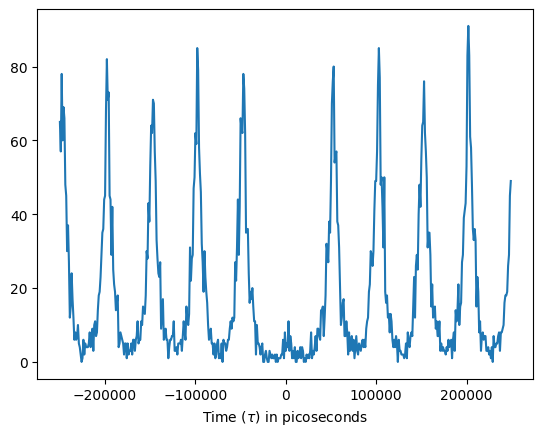

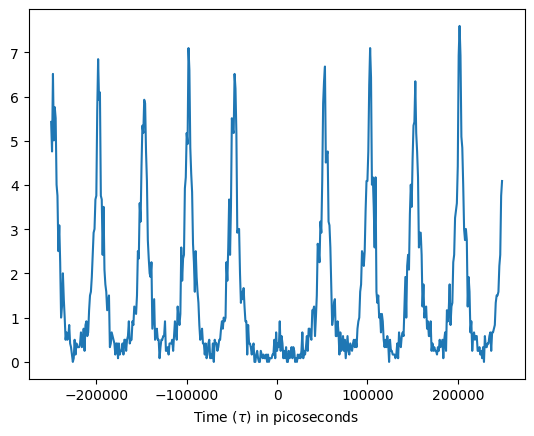

In [53]:
# measure photon antibunching
corr_ch1 = config['registered channels'][2] # first photon channel for antibunching measurements
corr_ch2 = config['registered channels'][3] # second photon channel for antibunching measurements
bwcorr = 1000 # 1 ns
nbins = 500

corr = Correlation(virtual_tagger, corr_ch1, corr_ch2, bwcorr, nbins)
cr = Countrate(virtual_tagger, [corr_ch1, corr_ch2])
print("\nCorrelation measurement is running.\n")


virtual_tagger.setReplaySpeed(-1.0) # Speed of -1.0 will replay the data as fast as possible
virtual_tagger.replay(file, begin = 0, duration = -1) # collect data until the end 
#virtual_tagger.replay(file, duration=8*10e11) # collect only 1 sec. of data (duration in picoseconds)
virtual_tagger.waitForCompletion()

# normalized correlation -> Photon Antibunching
xcorr = corr.getIndex()
ycorr_norm = corr.getDataNormalized()
ycorr = corr.getData()

rate_ch1 = cr.getData()[0]
rate_ch2 = cr.getData()[1]
counts_ch1 = cr.getCountsTotal()[0]
counts_ch2 = cr.getCountsTotal()[1]

print(f"Rate of counts channel {corr_ch1} (counts/sec) : {cr.getData()[0]}")
print(f"Total counts channel {corr_ch1} : {cr.getCountsTotal()[0]}")
print(f"Rate of counts channel {corr_ch2} (counts/sec) : {cr.getData()[1]}")
print(f"Total counts channel {corr_ch2} : {cr.getCountsTotal()[1]}")

plt.plot(xcorr, ycorr)
plt.xlabel(r'Time ($\tau$) in picoseconds')
plt.show()

plt.plot(xcorr, ycorr_norm)
plt.xlabel(r'Time ($\tau$) in picoseconds')
plt.show()

In [45]:
# Normalize counts 
capture_duration = np.mean([counts_ch1/rate_ch1, counts_ch2/rate_ch2]) * 1e12 # Capture duration in picoseconds
print("Capture duration (seconds): ", np.mean([counts_ch1/rate_ch1, counts_ch2/rate_ch2]))
counts_normalized = (ycorr  * capture_duration)/(bwcorr * counts_ch1 * counts_ch2) 

Capture duration (seconds):  48.447029981624


In [46]:
# Define the fitting function: a * (1 - b * exp(abs(tau - t0) / tau0)
def fitting_function(tau, t_0, tau_0, a, b):
    return a * (1 - b * np.exp(-np.abs(tau - t_0) / tau_0))

# Function to normalize counts and fit the data
def fit_params(tau, counts, expected_a):
    
    # Perform the curve fitting
    popt, pcov = curve_fit(fitting_function, tau, counts, p0=[2, 10, expected_a, 1])
    
    return popt, pcov

# Function to plot the normalized data and the fitted curve
def plot_fit_noblinking(tau, counts, t_0, tau_0, a, b, width, height, font_size):
    # Generar la curva ajustada
    tau_fine = np.linspace(min(tau), max(tau), 10000)
    fitted_curve = fitting_function(tau_fine, t_0, tau_0, a, b)
    
    # Cálculo del error como raíz cuadrada de counts
    errors = np.sqrt(counts)
    # Crear la figura
    plt.figure(figsize=(width, height))
    # Banda de error: área sombreada entre (counts - error) y (counts + error)
    plt.fill_between(tau, counts - errors, counts + errors, color="#0004FF", alpha=0.2)
    # Línea ajustada
    plt.plot(tau_fine, fitted_curve, color="#0004FF", linestyle='-', linewidth = 0.8)
    # Etiquetas de los ejes con tamaño de fuente modificado
    plt.xlabel('Time differences (ns)', fontsize=font_size)
    plt.ylabel('Counts', fontsize=font_size)
    # Cambiar el tamaño de los números en los ejes
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    # Activar la cuadrícula
    plt.grid(True)
    # Mostrar el gráfico
    plt.show()
    # Mostrar
    plt.tight_layout()
    plt.show()
    
def plot_fit_noblinking_norm(tau, counts, t_0, tau_0, a, b, width, height, font_size):
    # Crear la figura
    plt.figure(figsize=(width, height))
    # Graficar los datos normalizados
    plt.plot(tau, counts, linestyle='-', color='black', linewidth=0.7, label='Normalized Data')
    # Generar la curva ajustada
    tau_fine = np.linspace(min(tau), max(tau), 10000)
    fitted_curve = fitting_function(tau_fine, t_0, tau_0, a, b)
    # Graficar la curva ajustada
    plt.plot(tau_fine, fitted_curve, 'g--')
    # Etiquetas de los ejes con tamaño de fuente modificado
    plt.xlabel('Time differences (ns)', fontsize=font_size)
    plt.ylabel('Counts', fontsize=font_size)
    # Cambiar el tamaño de los números en los ejes
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    # Activar la cuadrícula
    plt.grid(True)
    # Mostrar el gráfico
    plt.show()

## Obtention of the normalized graph

In [47]:
popt, pcov = fit_params(xcorr/1000, ycorr, 100)
# Extract fitted parameters
t_0, tau_0, a, b = popt

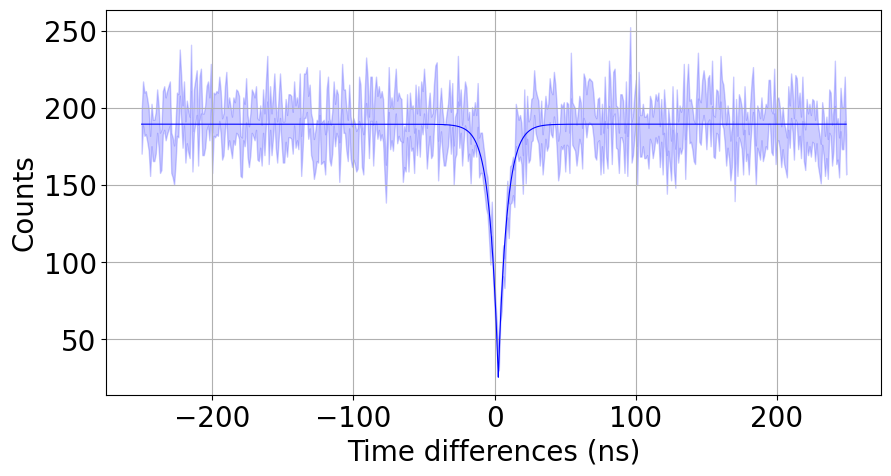

<Figure size 640x480 with 0 Axes>

In [48]:
# Plot the normalized data and the fitted curve
plot_fit_noblinking(xcorr/1000, ycorr, t_0, tau_0, a, b, width=10, height=5, font_size=20)

## Obtention of the normalized graph

In [12]:
popt, pcov = fit_params(xcorr/1000, counts_normalized, 1)
# Extract fitted parameters
t_0, tau_0, a, b = popt

counts_normalized = counts_normalized/a

popt, pcov = fit_params(xcorr/1000, counts_normalized, 1)
# Extract fitted parameters
t_0, tau_0, a, b = popt

# Calculate the standard deviations of the parameters
perr = np.sqrt(np.diag(pcov))
error_t0, error_tau0, error_a, error_b = perr

# Print fitted parameters and their errors
print(f"Fitted parameters:\n t₀ = {t_0:.3f} ± {error_t0:.3f} ns \n a = {1:.3f} ± {error_a/a:.3f} \n b = {b/a:.3f} ± {error_b/a:.3f}")
print(f"Lifetime = {tau_0:.2f} ± {error_tau0:.2f} ns")

# Calculate g²(τ = t₀)
value_at_t_0 = fitting_function(t_0, t_0, tau_0, a, b)
error_value_at_t_0 = np.sqrt(error_a**2 + error_b**2)  # Estimate error propagation
print(f"g²(τ = t₀) = {value_at_t_0:.3f} ± {error_value_at_t_0:.3f}")

Fitted parameters:
 t₀ = -4.039 ± 0.178 ns 
 a = 1.000 ± 0.004 
 b = 0.688 ± 0.039
Lifetime = 4.44 ± 0.37 ns
g²(τ = t₀) = 0.312 ± 0.039


C:\Users\HP\AppData\Local\Temp\ipykernel_7188\2348233339.py:3: RuntimeWarning: overflow encountered in exp
  return a * (1 - b * np.exp(-np.abs(tau - t_0) / tau_0))


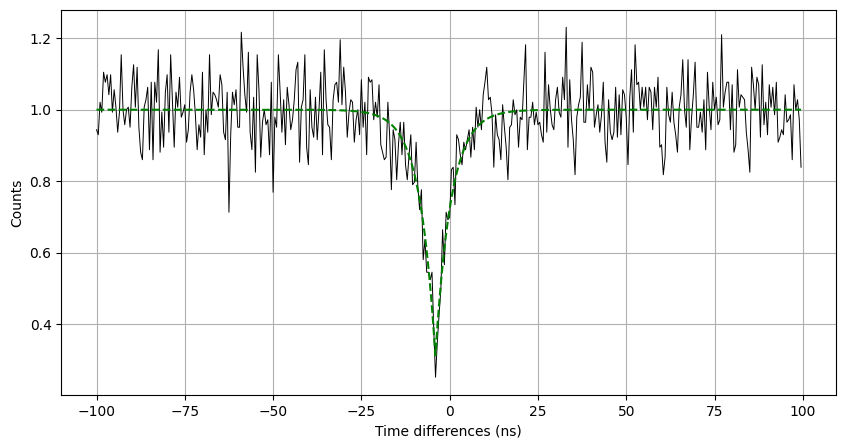

In [13]:
# Plot the normalized data and the fitted curve
counts_normalized = counts_normalized/a # Normalizamos las cuentas con el valor de a
plot_fit_noblinking_norm(xcorr/1000, counts_normalized, t_0, tau_0, a, b, width=10, height=5, font_size = 10)